Imports and helper functions

In [41]:
#Code source: https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Report", "fig")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Regression MLP imports

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, max_error

RNN imports

In [43]:
""" import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers """

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

Function for making models and generating plots, stolen from previous solution

In [44]:
def test_model(X_train, y_train, X_test, y_test, model):
 
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    print('--------------------TRAIN SET-------------------------')
    print('r2_score = ','%.2f' % r2_score(y_train,y_train_predicted), '(1.0 means perfect fit)')
    print('max_error = ','%.2f' % max_error(y_train,y_train_predicted))
    print('root_mean_squared_error = ','%.2f' % mean_squared_error(y_train,y_train_predicted, squared=False))
    print('--------------------TEST SET-------------------------')
    print('r2_score = ','%.2f' % r2_score(y_test,y_test_predicted), '(1.0 means perfect fit)')
    print('max_error = ','%.2f' % max_error(y_test,y_test_predicted))
    print('root_mean_squared_error = ','%.2f' % mean_squared_error(y_test,y_test_predicted, squared=False))
    print(y_train.index[:100])
    
    return r2_score(y_train,y_train_predicted), r2_score(y_test,y_test_predicted)

Import the training set and the data set

In [45]:
import pandas as pd
useless_features = ['engine','RUL', 'cycle', 'setting 3', 'sensor 1', 'sensor 5', 'sensor 6', 'sensor 10','sensor 14', 'sensor 16', 'sensor 18', 'sensor 19']

fd_001_train  = pd.read_csv('train_FD001.csv')
y_train_full = fd_001_train['RUL']
X_train_full = fd_001_train.drop(columns=useless_features)

fd_001_test = pd.read_csv('test_FD001.csv')
y_test = fd_001_test['RUL']
X_test = fd_001_test.drop(columns=useless_features)

""" X_mlp_train_full = X_train.copy()
y_mlp_train_full = y_train.copy()
X_mlp_test = X_train.copy()
y_mlp_test = y_train.copy() """

""" X_mlp_train, X_mlp_valid, y_mlp_train, y_mlp_valid = train_test_split(
    X_mlp_train_full, y_mlp_train_full, random_state=42) """

""" fan_prepared_test = num_pipeline.fit_transform(fd_001_test)
fan_labels_test = fd_001_test["RUL"].copy() """

' fan_prepared_test = num_pipeline.fit_transform(fd_001_test)\nfan_labels_test = fd_001_test["RUL"].copy() '

In [33]:
X_train_full.describe()

,setting 1,setting 2,sensor 2,sensor 3,sensor 4,sensor 7,sensor 8,sensor 9,sensor 11,sensor 12,sensor 13,sensor 15,sensor 17,sensor 20,sensor 21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,-0.000009,0.000002,642.680934,1590.523119,1408.933782,553.367711,2388.096652,9065.242941,47.541168,521.413470,2388.096152,8.442146,393.210654,38.816271,23.289705
std,0.002187,0.000293,0.500053,6.131150,9.000605,0.885092,0.070985,22.082880,0.267087,0.737553,0.071919,0.037505,1.548763,0.180746,0.108251
min,-0.008700,-0.000600,641.210000,1571.040000,1382.250000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8.324900,388.000000,38.140000,22.894200
25%,-0.001500,-0.000200,642.325000,1586.260000,1402.360000,552.810000,2388.050000,9053.100000,47.350000,520.960000,2388.040000,8.414900,392.000000,38.700000,23.221800
50%,0.000000,0.000000,642.640000,1590.100000,1408.040000,553.440000,2388.090000,9060.660000,47.510000,521.480000,2388.090000,8.438900,393.000000,38.830000,23.297900
75%,0.001500,0.000300,643.000000,1594.380000,1414.555000,554.010000,2388.140000,9069.420000,47.700000,521.950000,2388.140000,8.465600,394.000000,38.950000,23.366800
max,0.008700,0.000600,644.530000,1616.910000,1441.490000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8.584800,400.000000,39.430000,23.618400


<h2>Multi-layer Perceptron</h2>

3 hidden layers, Adam optimizer

In [30]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline_mlp_1 = make_pipeline(StandardScaler(), mlp_reg)
pipeline_mlp_1.fit(X_train_full, y_train_full)
y_pred = pipeline_mlp_1.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [31]:
rmse

46.594817064172354

3 hidden layers, lbfgs optimizer

In [32]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42, solver='lbfgs')
pipeline_mlp_2 = make_pipeline(StandardScaler(), mlp_reg)
pipeline_mlp_2.fit(X_train_full, y_train_full)
y_pred = pipeline_mlp_2.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

C:\Users\larsr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [33]:
rmse

47.553188000035384

Adam optimizer with lower learning rate

In [34]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42, learning_rate_init=0.0005, max_iter=600)
pipeline_mlp_3 = make_pipeline(StandardScaler(), mlp_reg)
pipeline_mlp_3.fit(X_train_full, y_train_full)
y_pred = pipeline_mlp_3.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [35]:
test_model(X_train_full,y_train_full,X_test,y_test, pipeline_mlp_1)
test_model(X_train_full,y_train_full,X_test,y_test, pipeline_mlp_2)
test_model(X_train_full,y_train_full,X_test,y_test, pipeline_mlp_3)

--------------------TRAIN SET-------------------------
r2_score =  0.65 (1.0 means perfect fit)
max_error =  223.69
root_mean_squared_error =  40.63
--------------------TEST SET-------------------------
r2_score =  0.38 (1.0 means perfect fit)
max_error =  218.75
root_mean_squared_error =  46.59
RangeIndex(start=0, stop=100, step=1)
--------------------TRAIN SET-------------------------
r2_score =  0.67 (1.0 means perfect fit)
max_error =  212.16
root_mean_squared_error =  39.70
--------------------TEST SET-------------------------
r2_score =  0.35 (1.0 means perfect fit)
max_error =  228.70
root_mean_squared_error =  47.55
RangeIndex(start=0, stop=100, step=1)
--------------------TRAIN SET-------------------------
r2_score =  0.66 (1.0 means perfect fit)
max_error =  217.51
root_mean_squared_error =  40.05
--------------------TEST SET-------------------------
r2_score =  0.38 (1.0 means perfect fit)
max_error =  214.91
root_mean_squared_error =  46.47
RangeIndex(start=0, stop=100, ste

(0.6619856937750026, 0.379175645112903)

<h2>Recurrent Neural Network</h2>

Let's try to load the dataset with torch

In [124]:
class CustomDataset(Dataset):
    def __init__(self, data, targets, scale_data=True):
        if scale_data:
            data_standard = StandardScaler().fit_transform(data)
        self.X = torch.from_numpy(data_standard)
        self.y = torch.tensor(targets.values, dtype=torch.float)
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self, idx):
        current_data = self.X[idx, :]
        current_target = self.y[idx]
        sample = current_data,  current_target
        return sample

In [125]:
train_dataset = CustomDataset(data=X_train_full, targets=y_train_full)
test_dataset = CustomDataset(data=X_test, targets=y_test)

In [126]:
train_dataset[0]

(tensor([-0.3160, -1.3730, -1.7217, -0.1343, -0.9259,  1.1211, -0.5163, -0.8628,
         -0.2665,  0.3343, -1.0589, -0.6038, -0.7817,  1.3485,  1.1944],
        dtype=torch.float64),
 tensor(191.))

In [127]:
train_dataloader = DataLoader(train_dataset)
test_dataloader = DataLoader(test_dataset)

Multi layer perceptron with Torch

In [135]:
# Define model
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(15, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [136]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [162]:
def train (data):
    # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Perform forward pass
    outputs = mlp(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer.step()
    
    return loss.item()
    


In [166]:
def test (data):
     # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
    
    # Perform forward pass
    outputs = mlp(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    return loss.item()
    

In [168]:
# Run the training loop
for epoch in range(0, 5): # 5 epochs at maximum
  
  # Print epoch
  print(f'Starting epoch {epoch+1}')

  # Set current loss value
  current_loss = 0.0
  test_loss = 0.0
  
  # Iterate over the DataLoader for training data
  for i, data in enumerate(train_dataloader, 0):
    
    """ # Get and prepare inputs
    inputs, targets = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Perform forward pass
    outputs = mlp(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer.step() """
    
    # Print statistics
    current_loss += train(data)
    if i % 1000 == 0:
        print('Loss after mini-batch %5d: %.3f' %
              (i + 1, current_loss / 500))
        current_loss = 0.0
  for i, data in enumerate(test_dataloader, 0):
    # Print statistics
    test_loss += test(data)
    if i % 1000 == 0:
        print('Test loss after mini-batch %5d: %.3f' %
              (i + 1, test_loss / 500))
        test_loss = 0.0
        
# Process is complete.
print('Training process has finished.')

Starting epoch 1
Loss after mini-batch     1: 0.063
Loss after mini-batch  1001: 60.612
Loss after mini-batch  2001: 43.916
Loss after mini-batch  3001: 37.899
Loss after mini-batch  4001: 69.807
Loss after mini-batch  5001: 48.674
Loss after mini-batch  6001: 43.942
Loss after mini-batch  7001: 46.107
Loss after mini-batch  8001: 48.070
Loss after mini-batch  9001: 49.744
Loss after mini-batch 10001: 44.171
Loss after mini-batch 11001: 45.087
Loss after mini-batch 12001: 69.970
Loss after mini-batch 13001: 83.329
Loss after mini-batch 14001: 123.782
Loss after mini-batch 15001: 52.020
Loss after mini-batch 16001: 46.966
Loss after mini-batch 17001: 73.061
Loss after mini-batch 18001: 64.479
Loss after mini-batch 19001: 88.230
Loss after mini-batch 20001: 95.625
Test loss after mini-batch     1: 0.005
Test loss after mini-batch  1001: 122.333
Test loss after mini-batch  2001: 131.530
Test loss after mini-batch  3001: 64.492
Test loss after mini-batch  4001: 115.610
Test loss after mini

In [151]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            #X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [158]:
mlp.eval()

MLP(
  (layers): Sequential(
    (0): Linear(in_features=15, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [161]:
mlp(test)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not function

In [150]:
mlp.eval()
torch.save(mlp.state_dict(), "mlp_model_torch.pth")
print("Saved PyTorch Model State to mlp_model_torch.pth")

Saved PyTorch Model State to mlp_model_torch.pth


Lets try RNN with Torch

In [142]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(15, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=15, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=1, bias=True)
  )
)


In [143]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [144]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X, y

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [145]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            #X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [146]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


RuntimeError: mat1 and mat2 must have the same dtype

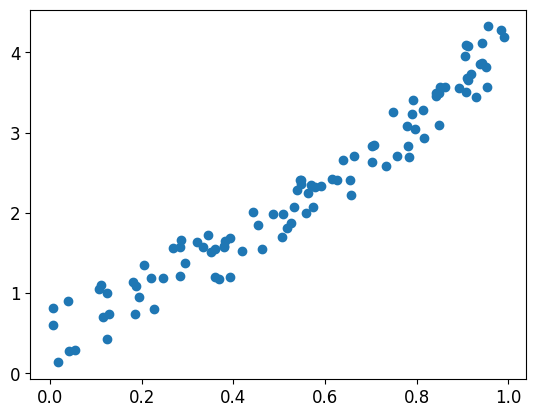

In [51]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

plt.scatter(x, y)
plt.show()

In [52]:
print(x, y)

[0.70368832 0.20537755 0.34578633 0.00618444 0.54674924 0.10583509
 0.81642895 0.53908583 0.05486176 0.78216681 0.12813997 0.46288816
 0.11167669 0.65574317 0.78008015 0.41806401 0.91147067 0.84149513
 0.85103715 0.11550736 0.57437397 0.9539109  0.70323876 0.38046883
 0.50701823 0.93869334 0.28359412 0.50911558 0.81402274 0.56245373
 0.79671655 0.01640915 0.35924399 0.95557992 0.66251308 0.75757289
 0.26925195 0.24594452 0.53299768 0.51730169 0.36105009 0.74775881
 0.79250962 0.54755019 0.59242947 0.38182256 0.54493402 0.12529279
 0.90773917 0.93045576 0.73395483 0.91326743 0.70717395 0.45436712
 0.9092302  0.39264724 0.84211439 0.94320655 0.91890966 0.62616743
 0.186682   0.4876609  0.7827188  0.36827864 0.86295424 0.33335232
 0.44212418 0.28517396 0.61619583 0.37994823 0.28305465 0.32147539
 0.84954417 0.90517096 0.8929423  0.95200309 0.29540049 0.56905443
 0.04168883 0.98419328 0.78968602 0.12326033 0.9903954  0.03810497
 0.94231401 0.00655177 0.65714115 0.18602914 0.55884098 0.8480

In [49]:
# convert numpy array to tensor in shape of input size
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
print(x, y)

tensor([[0.1860],
        [0.6906],
        [0.4548],
        [0.6744],
        [0.8927],
        [0.1820],
        [0.2191],
        [0.3992],
        [0.5337],
        [0.7261],
        [0.7891],
        [0.4268],
        [0.7827],
        [0.9019],
        [0.7478],
        [0.3457],
        [0.6754],
        [0.6508],
        [0.2762],
        [0.4080],
        [0.9263],
        [0.4477],
        [0.9933],
        [0.5244],
        [0.1542],
        [0.6760],
        [0.6813],
        [0.1011],
        [0.2423],
        [0.9539],
        [0.9680],
        [0.7626],
        [0.2917],
        [0.2139],
        [0.9316],
        [0.2281],
        [0.6971],
        [0.3119],
        [0.7892],
        [0.5273],
        [0.6609],
        [0.6452],
        [0.6797],
        [0.1833],
        [0.1401],
        [0.6635],
        [0.7804],
        [0.2870],
        [0.1118],
        [0.4706],
        [0.4329],
        [0.1952],
        [0.9398],
        [0.6063],
        [0.0655],
        [0

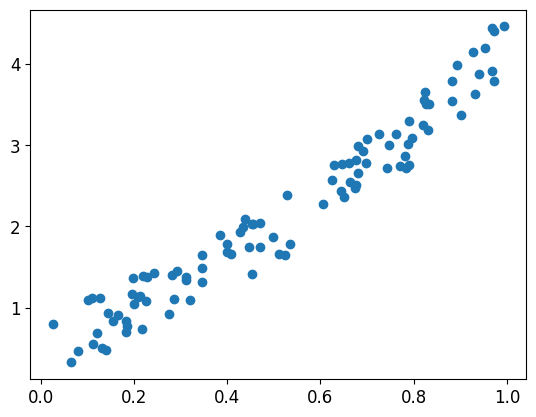

In [50]:
plt.scatter(x, y)
plt.show()